In [192]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import numpy as np
from tqdm import tqdm
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of gridDelivery failed: Traceback (most recent call last):
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/dzg/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(n

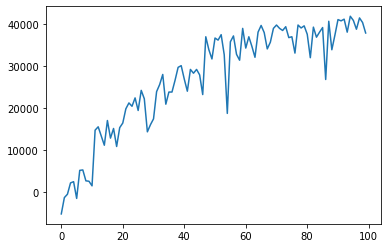

In [199]:
plt.plot(np.loadtxt("DQN/trainHistory.txt"))

[-4200, 39500, 33100, 9000, -1300, 29400, 37600, 37400, 49000, 49400, 19800, 35600, 26900, 13000, 44000, 35200, 47400, 35800, 43100, 33900, 7700, 9400, 49300, 15700, 29500, 17800, 49400, 46800, 18500, -1800, 30400, 25500, 50700, 46300, 2900, 50600, 44300, 32200, 14800, 37700, 28600, 22100, 44900, 14500, 42700, 32100, 3100, 47400, 6500, 24100, 600, 32700, 47800, 40300, 13000, 41900, 49500, 30400, 19900, 15000, 30000, 27100, 46800, 1700, 500, 24800, 25200, 32800, 26500, 15900, 49800, 42000, 35000, 49700, 45600, 23700, 23800, 34900, 26000, 9100, 38700, 7300, 11200, 50500, 35300, 39600, 37100, 50800, 44100, 42300, 12200, 33300, 23500, 50200, 34400, 20200, 39300, 50000, 34600, 49700]


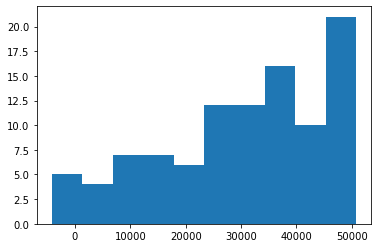

In [205]:
from gridDelivery import *
env = GridDeliveryDQN()
stat = []
for trial in range(100):
    cur_r = 0 
    env = GridDeliveryDQN()
    for _ in range(1440):
        s, action, reward, sp = env.step()
        cur_r += reward
    stat.append(cur_r)
plt.hist(stat)
print(stat)

In [161]:
stat = np.loadtxt("VI/samples.txt")
not_rush_samples = stat[np.where(stat[:,0] == 0)].astype(int)
rush_samples = stat[np.where(stat[:,0] == 1)].astype(int)

In [154]:
not_rush_samples.astype(int)

array([[0, 2, 2, 0, 2, 2],
       [0, 2, 2, 3, 2, 2],
       [0, 2, 2, 3, 2, 2],
       ...,
       [0, 4, 4, 3, 4, 4],
       [0, 4, 4, 2, 4, 3],
       [0, 4, 3, 2, 4, 2]])

In [156]:
T = np.zeros((26,4,26))
T[(not_rush_samples[:,1]*5+not_rush_samples[:,2]).astype(int), (not_rush_samples[:,3]).astype(int)\
    , (not_rush_samples[:,4]*5+not_rush_samples[:,4]).astype(int)]+=1

In [164]:
N = np.zeros((26, 4))
for sample in not_rush_samples:
    T[sample[1]*5+sample[2], sample[3], sample[4]*5+sample[5]] += 1
    N[sample[1]*5+sample[2], sample[3]] += 1

In [176]:
T = np.einsum('ijk, ij -> ijk', T, np.divide(1, N, out=np.zeros_like(N), where=N!=0))

In [180]:
np.dot(directions, [0,1])

array([ 0,  0, -1,  1])

In [181]:
directions

[[-1, 0], [1, 0], [0, -1], [0, 1]]

/Users/dzg/Box/aa228/AA228_FinalProject/src/gridDelivery.py:264: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/Users/dzg/Box/aa228/AA228_FinalProject/src/gridDelivery.py:266: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,2)


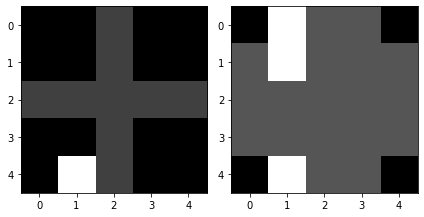

In [6]:
import matplotlib.animation as animation
from IPython import display

animation_1 = animation.FuncAnimation(plt.gcf(), grid.plot, interval = 100, frames=100)
video_1 = animation_1.to_html5_video()
html_code_1 = display.HTML(video_1)
display.display(html_code_1)
plt.tight_layout()
plt.show()

In [52]:
np.ravel_multi_index((0,0,0,1),(5,5,5,5))

1

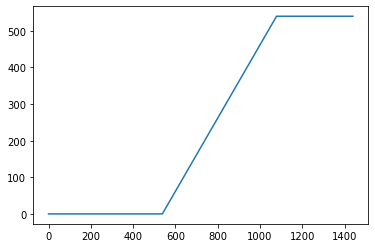

In [189]:

plt.clf()
plt.figure(dpi = 400)
plt.xlabel("Reward During 1 Day")
plt.ylabel("Number of Days")
plt.hist(np.sum(rewards_stat[:,:,1], axis=1))
plt.savefig("results/RandomTest.png")